In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import pandas
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import Lasso

In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.linear_model import SGDRegressor
from category_encoders.polynomial import PolynomialEncoder
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR

/home/rameez/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
os.chdir('./training_data')

In [6]:
labels=pandas.read_table('labels',index_col=0)

In [7]:
order_data=pandas.read_table('final_data_complete',index_col=0)

In [8]:
order_data.drop(labels=order_data.columns[3:-5],axis=1,inplace=True)

In [9]:
order_data.weather=order_data.weather.apply(np.ceil)

In [10]:
minmax_scaler=StandardScaler()
minmax_scaler.fit(np.array(order_data.values,dtype=np.float64))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
order_data[order_data.columns]=minmax_scaler.transform(np.array(order_data.values,dtype=np.float64))

In [11]:
date_encoder=ohe()
days_encoder=ohe()
weather_encoder=ohe()
region_encoder=ohe()

date_encoder.fit(np.arange(1,145,1).reshape((-1,1)))
days_encoder.fit(np.arange(0,7,1).reshape((-1,1)))
weather_encoder.fit(np.arange(1,16,1).reshape((-1,1)))
region_encoder.fit(np.arange(1,67,1).reshape((-1,1)))

OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [12]:
def one_hot_encode(values,encode_type):
#     label_encoder=le()
    #encoding labels
#     next_input=None
#     if convert:
#         next_input=label_encoder.fit_transform(np.unique(values))
#         label_encoded=label_encoder.transform(values[start:end])
#     else:
#         next_input=np.unique(values)
#         label_encoded=values[start:end]
    #one hot encoding
    hot_encoded=None
    if encode_type=='date':
        hot_encoded=date_encoder.transform(values)
    elif encode_type=='days':
        hot_encoded=days_encoder.transform(values)
    elif encode_type=='weather':
        hot_encoded=weather_encoder.transform(values)
    else:
        hot_encoded=region_encoder.transform(values)
    return hot_encoded

In [24]:
def convert_to_sparse(order_data,sparse=True):
    date_sparse=None
    region_sparse=None
    weather_sparse=None
    weekday_sparse=None
#     if hashed:
#     date_sparse=hash_feature(order_data.date.apply(convert_to_string).values,'date')
#     region_sparse=hash_feature(order_data.start_region_hash.apply(convert_to_string).values,'region')
#     weather_sparse=hash_feature(order_data.weather.apply(convert_to_string).values,'weather')
#     weekday_sparse=hash_feature(order_data.week_day.apply(convert_to_string).values,'days')
#     else:
    date_sparse=one_hot_encode(np.array(order_data.date.values.reshape((-1,1)),dtype=int),'date')
    region_sparse=one_hot_encode(np.array(order_data.start_region_hash.values.reshape((-1,1)),dtype=int),'region')
    weather_sparse=one_hot_encode(np.array(order_data.weather.values.reshape((-1,1)),dtype=int),'weather')
    weekday_sparse=one_hot_encode(np.array(order_data.week_day.values.reshape((-1,1)),dtype=int),'days')
    print date_sparse.toarray().shape
#     Y=np.array(labels.values.ravel(),dtype=np.float64)
#     print Y
    if sparse:
        remaining_sparse=scipy.sparse.csr_matrix(np.array(order_data.values[:,2:-2],dtype=np.float64))
        complete_data=scipy.sparse.hstack([region_sparse,date_sparse,remaining_sparse,weather_sparse,weekday_sparse])
#     labels_sparse=scipy.sparse.csr_matrix(Y.reshape((-1,1)))
        return complete_data
    else:
        f=pandas.DataFrame(region_sparse.toarray())
        g=pandas.DataFrame(date_sparse.toarray())
        h=pandas.DataFrame(weather_sparse.toarray())
        i=pandas.DataFrame(weekday_sparse.toarray())
        j=pandas.DataFrame(order_data.values[:,2:-2],columns=order_data.columns[2:-2])
        print j
        print f.shape,g.shape,j.shape,h.shape,i.shape
        return pandas.concat([f,g,j,h,i],axis=1,ignore_index=True).values

In [35]:
d=convert_to_sparse(order_data,sparse=False)

(163491, 144)
        number_of_orders         1       1#1      1#10      1#11       1#2  \
0               1.199495  0.788326  1.804293  2.745862  2.159094  1.085221   
1               0.523026  0.788326  1.804293  2.745862  2.159094  1.085221   
2               1.973874  0.788326  1.804293  2.745862  2.159094  1.085221   
3               2.018379  0.788326  1.804293  2.745862  2.159094  1.085221   
4               1.653442  0.788326  1.804293  2.745862  2.159094  1.085221   
5               2.053983  0.788326  1.804293  2.745862  2.159094  1.085221   
6               1.982775  0.788326  1.804293  2.745862  2.159094  1.085221   
7               2.027280  0.788326  1.804293  2.745862  2.159094  1.085221   
8               2.116289  0.788326  1.804293  2.745862  2.159094  1.085221   
9               2.142992  0.788326  1.804293  2.745862  2.159094  1.085221   
10              2.036181  0.788326  1.804293  2.745862  2.159094  1.085221   
11              2.134091  0.788326  1.804293  2.74

In [34]:
d

RangeIndex(start=0, stop=411, step=1)

In [59]:
order_data

,start_region_hash,date,number_of_orders,1,1#1,1#10,1#11,1#2,1#3,1#4,...,8#1,8#2,8#3,8#4,8#5,9#1#1,temperature,pm25,weather,week_day
0,1,1,1.199495,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,-0.772242,1.121493,1.0,4
1,1,10,0.523026,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,-0.906914,1.121493,1.0,4
2,1,100,1.973874,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,1.517179,0.947998,2.0,4
3,1,101,2.018379,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,1.517179,0.947998,2.0,4
4,1,102,1.653442,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,1.247836,0.678117,2.0,4
5,1,103,2.053983,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,1.247836,0.678117,2.0,4
6,1,104,1.982775,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,1.247836,0.678117,2.0,4
7,1,105,2.027280,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,0.978492,0.678117,2.0,4
8,1,106,2.116289,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,0.978492,0.678117,2.0,4
9,1,107,2.142992,0.788326,1.804293,2.745862,2.159094,1.085221,-0.460945,-0.211466,...,-0.512093,0.869756,-0.036117,-0.034678,-0.353105,-0.137254,0.978492,0.523899,2.0,4


In [14]:
newX=convert_to_sparse(order_data)

In [33]:
d.columns

AttributeError: 'RangeIndex' object has no attribute 'columns'

In [15]:
returntimeslot= lambda k : k[11:]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(order_data.values, labels.values, test_size=0.3)

In [12]:
SGD=SGDRegressor(n_iter=1000,loss='huber',penalty='l1',verbose=2,alpha=0.1)
SGD.fit(order_data.values,labels.gap.values)


-- Epoch 1
Norm: 3.99, NNZs: 2, Bias: 0.099067, T: 163491, Avg. loss: 0.811378
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 4.80, NNZs: 2, Bias: 0.145174, T: 326982, Avg. loss: 0.803388
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.36, NNZs: 3, Bias: 0.173116, T: 490473, Avg. loss: 0.799620
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 5.80, NNZs: 2, Bias: 0.189243, T: 653964, Avg. loss: 0.797231
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 6.16, NNZs: 2, Bias: 0.204462, T: 817455, Avg. loss: 0.795652
Total training time: 0.46 seconds.
-- Epoch 6
Norm: 6.47, NNZs: 3, Bias: 0.214434, T: 980946, Avg. loss: 0.794330
Total training time: 0.58 seconds.
-- Epoch 7
Norm: 6.75, NNZs: 2, Bias: 0.225749, T: 1144437, Avg. loss: 0.793251
Total training time: 0.68 seconds.
-- Epoch 8
Norm: 7.00, NNZs: 3, Bias: 0.233855, T: 1307928, Avg. loss: 0.792461
Total training time: 0.76 seconds.
-- Epoch 9
Norm: 7.23, NNZs: 2, Bias: 0.240705, T: 1471419, Avg. loss: 0.791708
Total 

SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', n_iter=1000, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, verbose=2, warm_start=False)

In [14]:
pclasses=SGD.predict(X_test)

In [ ]:
np.mean(np.abs(pclasses-y_test))

In [56]:
# ytest=y_test.copy()
# ytest.date=ytest.apply(returntimeslot)
# ytest.gap=ytest.gap.values-pclasses
# ytest.gap=ytest.gap.abs()
# ngrouped=ytest.groupby(by=['start_region_hash'])
# grouped=ngrouped.sum()/ngrouped.count()
# grouped.reset_index(inplace=True)

# # grouped.drop('date',axis=1,inplace=True)
# # grouped=grouped.groupby(by='start_region_hash')
# # innercounts=grouped.count()
# # innersum=grouped.sum()
# # innervals=innersum/innercounts
# np.mean(grouped.gap.values)
np.mean(np.abs(y_test.gap.values-pclasses))

9.5088918156005402

In [17]:
val=np.arange(0.01,5,0.1)

In [18]:
val

array([ 0.01,  0.11,  0.21,  0.31,  0.41,  0.51,  0.61,  0.71,  0.81,
        0.91,  1.01,  1.11,  1.21,  1.31,  1.41,  1.51,  1.61,  1.71,
        1.81,  1.91,  2.01,  2.11,  2.21,  2.31,  2.41,  2.51,  2.61,
        2.71,  2.81,  2.91,  3.01,  3.11,  3.21,  3.31,  3.41,  3.51,
        3.61,  3.71,  3.81,  3.91,  4.01,  4.11,  4.21,  4.31,  4.41,
        4.51,  4.61,  4.71,  4.81,  4.91])

In [19]:
def cross_validate(alphas,newX):
    scores=[]
    for a in alphas:
        print a
        X_train, X_test, y_train, y_test = train_test_split(newX, labels, test_size=0.3)
        SGD=SGDRegressor(n_iter=1000,epsilon=a,penalty='elasticnet',loss='huber',eta0=0.01,alpha=1e-06)
        SGD.fit(X_train,y_train.gap.values)
        pclasses=SGD.predict(X_test)
        s=np.mean(np.abs(y_test.gap.values-pclasses))
        print s
        scores.append(s)
    return scores

In [6]:
SVR()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
cross_validate(val,newX)

0.01
7.41592218681
0.11
7.29726957379
0.21
7.46536883945
0.31
7.21101806619
0.41
7.24412999554
0.51
7.24877806817
0.61
7.54320774208
0.71
7.43873360143
0.81
7.30724174825
0.91
7.38108373031
1.01
7.62642860681
1.11


In [14]:
date_pe=PolynomialEncoder(cols=['date'])
days_pe=PolynomialEncoder(cols=['week_day'])
weather_pe=PolynomialEncoder(cols=['weather'])
region_pe=PolynomialEncoder(cols=['start_region_hash'])

# date_pe=date_pe.fit(pandas.DataFrame(order_data.date.apply(convert_to_string)))
# days_pe=days_pe.fit(pandas.DataFrame(order_data.week_day.apply(convert_to_string)))
# weather_pe=weather_pe.fit(pandas.DataFrame(pandas.DataFrame(order_data.weather.apply(convert_to_string))))
# region_pe=region_pe.fit(pandas.DataFrame(pandas.DataFrame(order_data.start_region_hash.apply(convert_to_string))))

date_pe=date_pe.fit(order_data)
days_pe=days_pe.fit(order_data)
weather_pe=weather_pe.fit(order_data)
region_pe=region_pe.fit(order_data)

In [15]:
def convert_to_polynomial(order_data,sparse=False):
    order_copy=order_data.copy()
#     if hashed:
#     date_hashed=date_pe.transform(pandas.DataFrame(order_data.date.apply(convert_to_string),columns=['date']))
#     days_hashed=days_pe.transform(pandas.DataFrame(order_data.week_day.apply(convert_to_string)),columns=['week_days'])
#     weather_hashed=weather_pe.transform(pandas.DataFrame(order_data.weather.apply(convert_to_string)),columns['weather'])
#     region_hashed=region_pe.transform(pandas.DataFrame(order_data.start_region_hash.apply(convert_to_string)),columns=['region'])


    date_hashed=date_pe.transform(order_data)
    days_hashed=days_pe.transform(order_data)
    weather_hashed=weather_pe.transform(order_data)
    region_hashed=region_pe.transform(order_data)
    return pandas.concat([region_hashed,order_data[order_data.columns[2:-2]],weather_hashed,days_hashed,date_hashed],axis=1)


#     else:
#         date_sparse=one_hot_encode(np.array(order_data.date.values.reshape((-1,1)),dtype=int),'date')
#         region_sparse=one_hot_encode(np.array(order_data.start_region_hash.values.reshape((-1,1)),dtype=int),'region')
#         weather_sparse=one_hot_encode(np.array(order_data.weather.values.reshape((-1,1)),dtype=int),'weather')
#         weekday_sparse=one_hot_encode(np.array(order_data.week_day.values.reshape((-1,1)),dtype=int),'days')

#     Y=np.array(labels.values.ravel(),dtype=np.float64)
#     print Y
    if sparse:
        remaining_sparse=scipy.sparse.csr_matrix(np.array(order_data.values[:,2:-2],dtype=np.float64))
        complete_data=scipy.sparse.hstack([region_sparse,date_sparse,remaining_sparse,weather_sparse,weekday_sparse])
#     labels_sparse=scipy.sparse.csr_matrix(Y.reshape((-1,1)))
    else:
        region_hashed
        return pandas.concat([region_hashed,date_hashed,pandas.DataFrame(order_data.values[:,2:-2]),weather_hashed,days_hashed],axis=1,ignore_index=True)
#         return pandas.DataFrame({region_hashed.values,date_hashed.values,weather_hashed.values,days_hashed.values})

In [ ]:
date_hasher=FeatureHasher(input_type='string',n_features=1)
days_hasher=FeatureHasher(input_type='string',n_features=1)
weather_hasher=FeatureHasher(input_type='string',n_features=1)
region_hasher=FeatureHasher(input_type='string',n_features=1)

date_hasher=date_hasher.fit(order_data.date.apply(convert_to_string))
days_hasher=days_hasher.fit(order_data.week_day.apply(convert_to_string))
weather_hasher=weather_hasher.fit(order_data.weather.apply(convert_to_string))
region_hasher=region_hasher.fit(order_data.start_region_hash.apply(convert_to_string))

In [16]:
order=convert_to_polynomial(order_data)
order.shape

(163491, 253)

In [20]:
for i in arange(1,40,2):
    L=Lasso(max_iter=2000000)
    L.fit(order.values[:,i].reshape((-1,1)),labels.gap.values)

    pclasses=L.predict(order.values[:,i].reshape((-1,1)))
    print L.score(order.values[:,i].reshape((-1,1)),labels.gap.values)
    ytest=labels.copy()
    ytest.gap=ytest.gap.values-pclasses
    ytest.gap=ytest.gap.abs()
    ytest.drop(labels=['date'],axis=1,inplace=True)
    grouped=ytest.groupby(by='start_region_hash')
    innercounts=grouped.count()
    innersum=grouped.sum()
    innervals=innersum/innercounts
    print ' ',np.mean(innervals.gap.values)

0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229
0.0
  12.5745940229


In [79]:
pclasses

array([ 15.28012043,  15.32607143,  15.78558149, ...,   9.48048106,
         9.48558673,   9.4906924 ])

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
pf=PolynomialFeatures()

In [11]:
higher_order=pf.fit_transform(order_data)

In [16]:
features=order_data.shape[1]

In [ ]:
features=order_data.values.shape[1]

In [4]:
mx=np.mean(X,axis=0)
stdx=np.std(X,axis=0)
X=(X-mx)/stdx

In [12]:
order_data

,start_region_hash,date,number_of_orders,temperature,pm25,weather,week_day,day
0,-1.655686,-1.960364,1.199495,-0.772242,1.121493,-1.320111,0.494117,-1.645180
1,-1.655686,-1.935001,1.297405,-0.906914,1.121493,-1.320111,0.494117,-1.645180
2,-1.655686,-1.706726,0.175890,-0.906914,1.680533,-1.320111,0.494117,-1.645180
3,-1.655686,0.576017,2.018379,1.517179,0.947998,-0.681651,0.494117,-1.645180
4,-1.655686,0.601381,1.653442,1.247836,0.678117,-0.681651,0.494117,-1.645180
5,-1.655686,0.626745,2.053983,1.247836,0.678117,-0.681651,0.494117,-1.645180
6,-1.655686,0.652108,1.982775,1.247836,0.678117,-0.681651,0.494117,-1.645180
7,-1.655686,0.677472,2.027280,0.978492,0.678117,-0.681651,0.494117,-1.645180
8,-1.655686,0.702836,2.116289,0.978492,0.678117,-0.681651,0.494117,-1.645180
9,-1.655686,0.728200,2.142992,0.978492,0.523899,-0.681651,0.494117,-1.645180


In [2]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "/home/rameez/anaconda2/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/rameez/anaconda2/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/rameez/anaconda2/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
ImportError: libcudnn.so.5: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [30]:
sess=tf.InteractiveSession()

In [51]:
alpha=0.0001 # learning rate
epochs=900000 # number of epochs..
neurons=256

In [52]:
# your code here
# Xi, Yi should be placeholders and h should be hypothesis
Xi=tf.placeholder(tf.float64,[None,features])
Yi=tf.placeholder(tf.float64,[None,1])

W1=tf.Variable(tf.random_normal([features,neurons],dtype=tf.float64),dtype=tf.float64)
b1=tf.Variable(tf.random_normal([neurons],dtype=tf.float64),dtype=tf.float64)

W2=tf.Variable(tf.random_normal([neurons,neurons],dtype=tf.float64),dtype=tf.float64)
b2=tf.Variable(tf.random_normal([neurons],dtype=tf.float64),dtype=tf.float64)

WOut=tf.Variable(tf.random_normal([neurons,1],dtype=tf.float64),dtype=tf.float64)
bOut=tf.Variable(tf.random_normal([1],dtype=tf.float64),dtype=tf.float64)

nl1_affine=tf.add(tf.matmul(Xi,W1),b1)
nl1_relu=tf.nn.relu(nl1_affine)

nl2_affine=tf.add(tf.matmul(nl1_relu,W2),b2)
nl2_relu=tf.nn.relu(nl2_affine)

h_affine=tf.add(tf.matmul(nl2_relu,W2),b2)
h_relu=tf.nn.relu(h_affine)

loss=tf.reduce_mean(tf.square(h_relu-Yi))

optimizer=tf.train.GradientDescentOptimizer(alpha).minimize(loss)

init=tf.global_variables_initializer()


In [ ]:
#with tf.Session() as sess:
sess.run(init)

for e in range (epochs):        
    Xsplit=np.split(order_data.values[:-1],10)# batch size of 100
    Ysplit=np.split(labels.gap.values[:-1],10)
    for i in range(len(Xsplit)):
        sess.run(optimizer,feed_dict={Xi:Xsplit[i],Yi:Ysplit[i].reshape((-1,1))})

    if e % 10 ==0:
        print ('After {} Epochs Loss Function Value is {}'.format(e, sess.run(loss,feed_dict={Xi:order_data.values,Yi:labels.gap.values.reshape((-1,1))})))

theta=np.array(sess.run(W1))
bias=np.array(sess.run(b1))
res=np.array(sess.run(h,feed_dict={Xi:X}))
print theta, bias

After 0 Epochs Loss Function Value is 16895.4546511


[-1.65568566 -1.9603644   1.19949518 -0.77224229  1.12149321 -1.32011117
  0.49411683 -1.64517966] 9


ValueError: Cannot feed value of shape () for Tensor u'Placeholder_17:0', which has shape '(1,)'

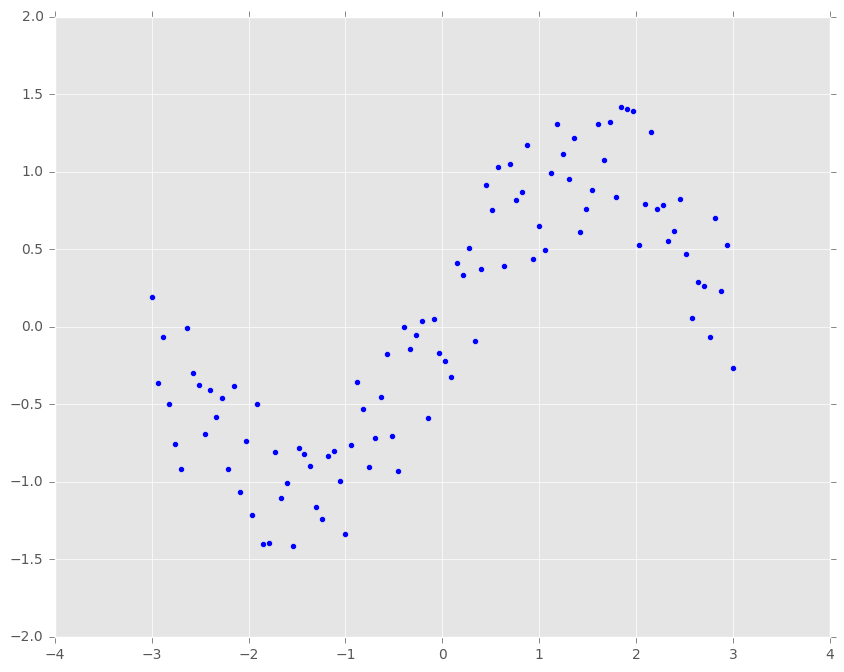

In [33]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# %% Let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32,[features])
Y = tf.placeholder(tf.float32,[1])

# %% Instead of a single factor and a bias, we'll create a polynomial function
# of different polynomial degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(tf.random_normal([features]), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_mean(tf.pow(Y_pred - Y, 2))

# %% if we wanted to add regularization, we could add other terms to the cost,
# e.g. ridge regression has a parameter controlling the amount of shrinkage
# over the norm of activations. the larger the shrinkage, the more robust
# to collinearity.
# cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))

# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# %% We create a session to use the graph
n_epochs = 1000
with tf.Session() as sess:
    ox=order_data.values
    ol=labels.gap.values
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for index in xrange(order_data.shape[0]):
            print ox[index],ol[index]
            sess.run(optimizer, feed_dict={X:ox[index,:] , Y: ol[index]})

        training_cost = sess.run(
            cost, feed_dict={X: ox, Y: ol})
        print(training_cost)

        if epoch_i % 100 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: ox}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.show()
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
ax.set_ylim([-3, 3])
fig.show()